In [1]:
!pip install sklearn
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
application = pd.read_csv("application_record.csv")
credit = pd.read_csv("credit_record.csv")

In [3]:
df_merge = pd.merge(application,credit,on=['ID','ID'])

In [4]:
print(len(set(df_merge['ID'])))

36457


In [5]:
df_merge

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-9,C


In [6]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
ID                     777715 non-null int64
CODE_GENDER            777715 non-null object
FLAG_OWN_CAR           777715 non-null object
FLAG_OWN_REALTY        777715 non-null object
CNT_CHILDREN           777715 non-null int64
AMT_INCOME_TOTAL       777715 non-null float64
NAME_INCOME_TYPE       777715 non-null object
NAME_EDUCATION_TYPE    777715 non-null object
NAME_FAMILY_STATUS     777715 non-null object
NAME_HOUSING_TYPE      777715 non-null object
DAYS_BIRTH             777715 non-null int64
DAYS_EMPLOYED          777715 non-null int64
FLAG_MOBIL             777715 non-null int64
FLAG_WORK_PHONE        777715 non-null int64
FLAG_PHONE             777715 non-null int64
FLAG_EMAIL             777715 non-null int64
OCCUPATION_TYPE        537667 non-null object
CNT_FAM_MEMBERS        777715 non-null float64
MONTHS_BALANCE         777715 non-null int64
STATUS                

In [7]:
df_merge.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [8]:
df_merge["suitable_for_credit"] = np.where((df_merge["AMT_INCOME_TOTAL"] >= 42750.0)  & (df_merge["NAME_HOUSING_TYPE"] == "House / apartment"), 1, 0)

In [9]:
df_merge

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,suitable_for_credit
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-2,C,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-3,C,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-4,C,0
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-5,C,0
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-6,C,0
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-7,C,0
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-8,C,0
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-9,C,0


In [10]:
df_merge["suitable_for_credit"].value_counts()[[1,""]].sum()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:1148: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


695092.0

In [11]:
df_x = df_merge[["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN"
                 ,"AMT_INCOME_TOTAL","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
                 "NAME_HOUSING_TYPE","DAYS_EMPLOYED","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE",
                 "FLAG_EMAIL","OCCUPATION_TYPE","CNT_FAM_MEMBERS","MONTHS_BALANCE","STATUS"]].copy()
df_y = df_merge[['suitable_for_credit']].copy()

In [12]:
df_x.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,0,C
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,-1,C
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,-2,C
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,-3,C
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,-4,C


In [13]:
df_y.head()

df_x = df_x.apply(pd.to_numeric, errors='coerce')
df_y = df_y.apply(pd.to_numeric, errors='coerce')

df_x.fillna(0, inplace=True)
df_y.fillna(0, inplace=True)

In [14]:
# Data = %67 training , %33 test
x_train, x_test, y_train , y_test = train_test_split(df_x, df_y, test_size = 0.33, random_state = 42)

from sklearn.tree import DecisionTreeRegressor
reg_decisionTreeRegressor = DecisionTreeRegressor(random_state=0)
reg_decisionTreeRegressor.fit(x_train,y_train)
y_pred_decisionTreeRegressor = reg_decisionTreeRegressor.predict(x_test)
y_pred_decisionTreeRegressor

array([1., 1., 1., ..., 1., 1., 1.])

In [15]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decisionTreeRegressor.round()))

Accuracy: 0.9936488392571869


In [16]:
from sklearn.tree import DecisionTreeClassifier
reg_decisionTreeClassifier = DecisionTreeClassifier(random_state=0)
reg_decisionTreeClassifier.fit(x_train,y_train)
y_pred_decisionTreeClassifier = reg_decisionTreeClassifier.predict(x_test)
y_pred_decisionTreeClassifier

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decisionTreeClassifier.round()))

Accuracy: 0.9936488392571869


In [18]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier()
reg_knn.fit(x_train,y_train)
y_pred_knn = reg_knn.predict(x_test)
y_pred_knn

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, ..., 1, 1, 1])

In [19]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn.round()))

Accuracy: 0.9879405874239224


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

reg_randomForestClassifier = RandomForestClassifier(max_depth=150, random_state=0)
reg_randomForestClassifier.fit(x_train,y_train.values.ravel())
y_pred_randomForestClassifier = reg_randomForestClassifier.predict(x_test)
y_pred_randomForestClassifier

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_randomForestClassifier.round()))

Accuracy: 0.9894640867186708


In [23]:
reg_randomForestRegressor = RandomForestRegressor()
reg_randomForestRegressor.fit(x_train,y_train)
y_pred_randomForestRegressor = reg_randomForestRegressor.predict(x_test)
y_pred_randomForestRegressor

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([1.  , 1.  , 0.99, ..., 1.  , 1.  , 1.  ])

In [24]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_randomForestRegressor.round()))

Accuracy: 0.9939644490855107


In [25]:
from sklearn.naive_bayes import GaussianNB
reg_naiveBayes = GaussianNB()
reg_naiveBayes.fit(x_train,y_train)
y_pred_naiveBayes = reg_naiveBayes.predict(x_test)
y_pred_naiveBayes

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 1, ..., 1, 1, 1])

In [26]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_naiveBayes.round()))

Accuracy: 0.8909704417758313


In [27]:
def estimateValue():
    print("Prediction Program: \n")
    
    
    one = float(input('CODE GENDER : '))
    two = float(input('FLAG OWN CAR : '))
    three = float(input('FLAG OWN REALTY : '))
    four = float(input('CHILDREN COUNT : '))
    five = float(input('AMOUNT INCOME TOTAL : '))
    six = float(input('NAME INCOME TYPE : '))
    seven = float(input('NAME EDUCATION TYPE : '))
    eight = float(input('NAME FAMILY STATUS : '))
    nine = float(input('NAME HOUSING TYPE : '))
    ten = float(input('DAYS EMPLOYED : '))
    eleven = float(input('FLAG MOBIL : '))
    twelve = float(input('FLAG WORK PHONE'))
    thirteen = float(input('FLAG PHONE : '))
    fourteen = float(input('FLAG EMAIL : '))
    fifteen = float(input('OCCUPATION TYPE : '))
    sixteen = float(input('COUNT FAMILY MEMBERS: '))
    seventeen = float(input('MONTHS BALANCE : '))
    eighteen = float(input('STATUS : '))
    
    
    #prediction = reg_randomForestRegressor.predict([[0,0,0,1,135000,0,0,0,0,1,0,1,0,0,0,2,0,0]])
    prediction = reg_randomForestClassifier.predict([[one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen]]) 
    print('Predicted Value : ', prediction)  
estimateValue()

Prediction Program: 

CODE GENDER : 0
FLAG OWN CAR : 0
FLAG OWN REALTY : 0
CHILDREN COUNT : 1
AMOUNT INCOME TOTAL : 135000
NAME INCOME TYPE : 0
NAME EDUCATION TYPE : 0
NAME FAMILY STATUS : 0
NAME HOUSING TYPE : 0
DAYS EMPLOYED : 1
FLAG MOBIL : 0
FLAG WORK PHONE1
FLAG PHONE : 0
FLAG EMAIL : 0
OCCUPATION TYPE : 0
COUNT FAMILY MEMBERS: 2
MONTHS BALANCE : 0
STATUS : 0
Predicted Value :  [1]


In [28]:
x_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
288774,0.0,0.0,0.0,1,135000.0,0.0,0.0,0.0,0.0,-1915,1,0,1,0,0.0,3.0,-40,0.0
304455,0.0,0.0,0.0,1,324000.0,0.0,0.0,0.0,0.0,-4795,1,0,0,0,0.0,3.0,-47,0.0
28143,0.0,0.0,0.0,0,675000.0,0.0,0.0,0.0,0.0,-2200,1,0,0,0,0.0,2.0,-26,0.0
266136,0.0,0.0,0.0,1,234000.0,0.0,0.0,0.0,0.0,-3611,1,0,0,0,0.0,3.0,-23,0.0
627026,0.0,0.0,0.0,0,247500.0,0.0,0.0,0.0,0.0,-1800,1,0,1,0,0.0,1.0,-23,0.0


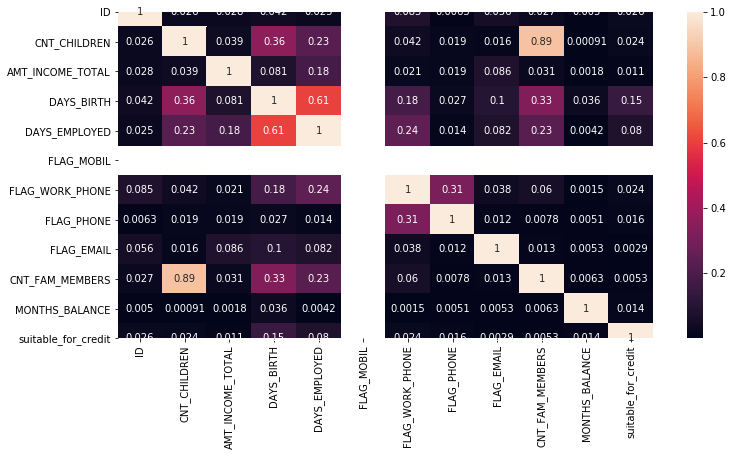

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_merge.corr().abs(), annot=True) # abs is = mutlak deger and Compute pairwise correlation of columns

In [32]:
df_merge

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,suitable_for_credit
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-2,C,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-3,C,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-4,C,0
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-5,C,0
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-6,C,0
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-7,C,0
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-8,C,0
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-9,C,0


In [ ]:
"""
paint = pd.DataFrame(df_merge, columns=df_merge.columns)
paint.plot.area(figsize=(20,10)) # y ekseni kaç tane veri olduğunu gösteriyor ve x ekseni de sırasıyla karşılık olan değerleri
"""

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_merge, figsize = (18,9))